In [170]:
import numpy as np
import matplotlib.pyplot as plt
import random,math
import sys


## Random Walk

In [25]:
def random_walk(n=100,step=1):
    x, y = 0, 0
    timeframe= np.arange(n+1)
    positions=[y]
    directions=["U","D"]

    for i in range(1,n+1):
        choice=random.choice(directions)
        if choice == "U":
            y+=step
            positions.append(y)
        if choice == "D":
            y-=step
            positions.append(y)
    return positions,timeframe

Max:-  10
Min:-  -48
Mean:-  -10.031968031968033
Standard deviation value:-  13.579049540985572


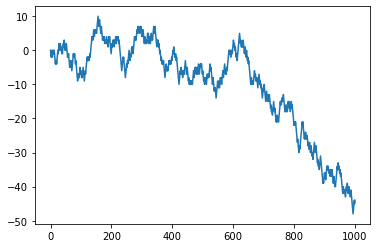

In [26]:
y,x=random_walk(1000)
print("Max:- ",max(y))
print("Min:- ",min(y))
print("Mean:- ",np.mean(y))
print("Standard deviation value:- ",np.std(y))
plt.plot(x,y)

## Brownian Motion

In [27]:
def brownianMotion(mu=0,sigma=1,steps=100,delta_t=0.01):
    t=np.linspace(0,steps*delta_t,steps)
    dB = np.sqrt(delta_t) * np.random.randn(num_steps)
    B = np.cumsum(dB)
    drift = (mu - 0.5 * sigma**2) * t
    return sigma * B + drift

2.171623678947302


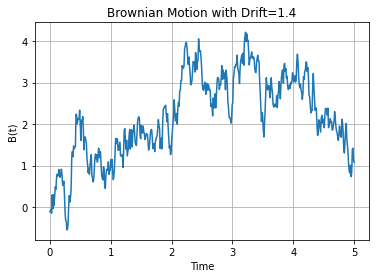

In [29]:
mu=1.4
sigma=2.3
num_steps=500
delta_t=.01
B = brownianMotion(mu, sigma, num_steps, delta_t)
print(np.mean(B))
plt.plot(np.linspace(0,delta_t*num_steps,num_steps),B)
plt.xlabel('Time')
plt.ylabel('B(t)')
plt.title('Brownian Motion with Drift={}'.format(mu))
plt.grid(True)
plt.show()

### Geometric Brownian Motion

In [30]:
def geometric_brownian_motion(S0=0, mu=0, sigma=1, num_steps=500, delta_t=0.01):
    t = np.linspace(0, num_steps * delta_t, num_steps)
    dB = np.sqrt(delta_t) * np.random.randn(num_steps)
    B = np.cumsum(dB)
    drift = (mu - 0.5 * sigma**2) * t
    return S0 * np.exp(drift + sigma * B)

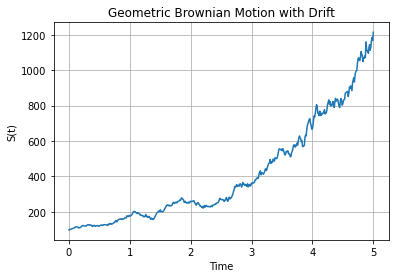

In [31]:
S0 = 100
mu = 0.6
sigma = 0.23
num_steps = 500
delta_t = 0.01

S = geometric_brownian_motion(S0, mu, sigma, num_steps, delta_t)

plt.plot(np.linspace(0, num_steps * delta_t, num_steps), S)
plt.xlabel('Time')
plt.ylabel('S(t)')
plt.title('Geometric Brownian Motion with Drift')
plt.grid(True)
plt.show()

# Financial Tools

### price of a simple bond

In [32]:
def simple_bond(A,r):
    """ returns the no arbritage price of a bond that pays $A at the end of one year with interest rate at r percent"""
    cost= A/(1+(r/100))
    return cost

In [33]:
print("Minimum no arbritage cost of the bond is $ {}".format(simple_bond(120,8)))

Minimum no arbritage cost of the bond is $ 111.1111111111111


### present value

In [34]:
def present_value(c,r):
    """ returns the present value of a contract with payoffs c and interest rate of the corresponding time period"""
    
    t=len(c)
    present_value=0
    for i in range(t):
        present_value+=c[i]/(1+(r/100))**i

    return present_value

In [237]:
a=present_value(3*[206.25],9)
print("Present value of the contract is $ {}".format(a))

Present value of the contract is $ 569.0666820974665


### Price of a contract with lending and borrowing rate

In [36]:
def dual_contract(c,r_l,r_b):
    upper_range=present_value(c,r_l)
    lower_range=present_value(c,r_b)
    return [lower_range,upper_range]

In [37]:
print("lower and upper range of the contract price should be :{}".format(dual_contract(20*[500000],8,10)))

lower and upper range of the contract price should be :[4682460.045867208, 5301799.600022614]


### perpetuity and annuity

In [38]:
def perpetuity(A,r):
    """Fixed amount of A received for all intervals"""
    r=r/100
    return A/r

def annuity(A,r,n):
    """Fixed amount of A received upto n intervals"""
    a=0
    r=r/100
    for i in range(n):
        a+=A/(1+r)**i
    return a

### Forward price$$

In [244]:
def forward_price(S_0,r,T,dividend='n',c=[],r_d=[]):
    """computes the forward price of a forward contract at time 0 upto a maturity time T
    S_0: current price
    r : rate in decimals
    T: time of delivery
    dividend: non-dividend paying or not
    c: list of dividend payments, empty by default
    r_d: array of discounted rates from time 0"""
    a = S_0*(1+r)**T
    if dividend=='n':
        return a
    elif dividend == 'y':
        cd=0;
        for i in range(len(c)):
            cd+= c[i] * (1+r_d[i])**i
        a+=cd
    return a

In [255]:
forward_price(206,r=(0.09/4),T=3,dividend='y',c=3*[0.25],r_d=3*[.09/4])

220.98721053124996

## Option pricing models
- one period binomial : European(put/call) American(put/call)
- n period binomial : European(put/call) American(put/call)
- black scholes model : European(put/call) American(put/call)

In [225]:
def one_period_binomial(S_0,R,u,K,c=0):
    """pricing of european call options using one period binomial 
    S_0 :- current price
    R :- cash price asset return
    u :- return per period
    K :- strike price
    c :-dividend per stock price  per period"""
    
    q=(R-d-c)/(u-d)
    
    ## building the prices array
    rows,cols=(2,2)
    prices=np.array([[0 for i in range(cols)] for j in range(rows)],dtype=np.float16)
    prices[0][0]=S_0
    prices[0][1]=u*S_0
    prices[1][1]=float(S_0/u)
    print("One period binomial pricing is ",prices)
    
    #building the payoffs array
    p_rows,p_cols=(2,1)
    payoffs=np.array([[0 for i in range(p_cols)] for j in range(p_rows)],np)
    for i in range(p_rows):
        for j in range(p_cols):
            payoffs[i][j]=max(prices[i][j-1]-K,0)
    print("Payoffs of the options upon maturity are ",payoffs)
    
    # building the risk neutral probabilities
    risk_prob=np.array([q,1-q])
    print("probability of the stock price going up and down are ",risk_prob," respectively")
    
    a=np.matmul(risk_prob,payoffs)
    return a[0]

In [241]:
one_period_binomial(50,1.05,1.08,52)

One period binomial pricing is  [[50.   54.  ]
 [ 0.   46.28]]
Payoffs of the options upon maturity are  [[2.0]
 [0]]
probability of the stock price going up and down are  [0.7937018 0.2062982]  respectively


1.5874035989717221

In [185]:
np.matmul(rnp,pay)/R**3

6.000942274236872

In [230]:
## european call option for n periods

def n_period_binomial(S_0,R,u,K,n=1,c=0,mode='call'):
    q=(R-d-c)/(u-d)
    
    ## building the prices array
    rows,cols=(n+1,n+1)
    prices=np.array([[0 for i in range(rows)] for j in range(cols)],dtype=np.float16)
    for i in range(rows):
        for j in range(cols):
            if i<=j:
                prices[i][j]=(u**(j-2*i))*S_0
    print(prices)
    
    p_rows,p_cols=(n+1,n)
    payoffs=np.array([[0 for i in range(p_cols)] for j in range(p_rows)],dtype=np.float16)
    
    #building the payoffs array
    for i in range(p_rows):
        for j in range(p_cols):
            payoffs[i][j]=max(prices[i][j+1]-K,0)
    print(payoffs[:,-1]) 
    
    # building the risk neutral probabilities
    cols=(n+1)
    risk_prob=np.array([0 for j in range(cols)],dtype=np.float16)
    for i in range(cols):
        risk_prob[i]=math.comb(n,i)*(q**(n-i))*((1-q)**i)
    risk_prob.reshape(1,n+1)
    print(risk_prob)
    
    a=np.matmul(risk_prob,payoffs[:,-1])
    return a/(R**n)

In [235]:
n_period_binomial(114.5,1.01,1.07,100,n=1,c=0)

[[114.5 122.5]
 [  0.  107. ]]
[22.5  7. ]
[0.557 0.443]


15.485767326732674

In [236]:
def black_scholes(call_put_flag, S, X, T, r, sigma):
    """ calculates the price of the option using the Black-Scholes formula
    parameters:-
    call_put_flag: A string specifying whether the option is a call ('c') or a put ('p')
    S: The current stock price
    X: The option strike price
    T: The time until option expiration, expressed in years
    r: The risk-free interest rate
    sigma: The stock's annualized volatility"""
    d1 = (math.log(S / X) + (r + sigma**2 / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    if call_put_flag == 'c':
        option_price = S * norm_cdf(d1) - X * math.exp(-r * T) * norm_cdf(d2)
    elif call_put_flag == 'p':
        option_price = X * math.exp(-r * T) * norm_cdf(-d2) - S * norm_cdf(-d1)
    else:
        raise ValueError('Call/put flag must be "c" or "p".')
    return option_price

def norm_cdf(x):
    return (1.0 + math.erf(x / math.sqrt(2.0))) / 2.0
